In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
df = pd.read_csv('/content/DOHMH_Dog_Bite_Data.csv')

In [ ]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,DOG,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,DOG,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,DOG,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,DOG,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207
...,...,...,...,...,...,...,...,...,...
10275,"10,276",December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
10276,"10,277",December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
10277,"10,278",December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
10278,"10,279",December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [ ]:
#Finding empty values in columns
df.isnull().sum()

UniqueID         0
DateOfBite       0
Species          0
Breed         1588
Age           4746
Gender           0
SpayNeuter       0
Borough          0
ZipCode       2667
dtype: int64

In [ ]:
#Filling in empty values
df['Breed'].fillna("Undetermined", inplace=True)
df['Age'] = df['Age'].fillna(00)
df['ZipCode'].fillna("00000", inplace=True)

In [ ]:
#Running again to ensure columns are filled in
df.isnull().sum()

UniqueID      0
DateOfBite    0
Species       0
Breed         0
Age           0
Gender        0
SpayNeuter    0
Borough       0
ZipCode       0
dtype: int64

In [ ]:
#Deciphering datatypes by column
df.dtypes

UniqueID      object
DateOfBite    object
Species       object
Breed         object
Age           object
Gender        object
SpayNeuter      bool
Borough       object
ZipCode       object
dtype: object

In [ ]:
#Dropping an unnecessary column
df.drop(columns=['Species'], inplace=True)
df.head()

,UniqueID,DateOfBite,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 02 2015,"Poodle, Standard",3,M,True,Brooklyn,11238
1,2,January 02 2015,HUSKY,NaN,U,False,Brooklyn,11249
2,3,January 02 2015,NaN,NaN,U,False,Brooklyn,NaN
3,4,January 01 2015,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207


In [ ]:
#Determining the size of the dataset
df.count()

UniqueID      10280
DateOfBite    10280
Breed         10280
Age           10280
Gender        10280
SpayNeuter    10280
Borough       10280
ZipCode       10280
dtype: int64

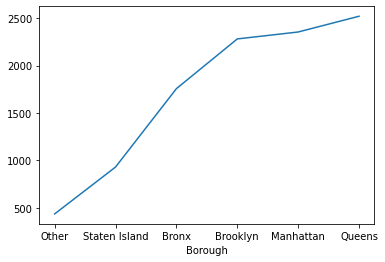

In [ ]:
#Finding number of cases unique to each borough in ascending order
df.groupby(['Borough'])['UniqueID'].count().sort_values(ascending=True).plot(kind='line')

In [ ]:
#Identifying how many dogs were spayed/neutered in attacks to those who were not
df.groupby(['SpayNeuter'])['UniqueID'].count()

SpayNeuter
False    7289
True     2991
Name: UniqueID, dtype: int64

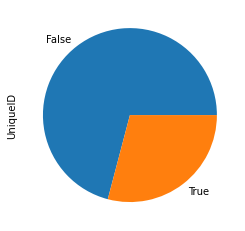

In [ ]:
#Visualizing the above data
df.groupby(['SpayNeuter'])['UniqueID'].count().plot(kind='pie')

In [ ]:
#Grouping unique cases by gender of dog
df.groupby(['Gender'])['UniqueID'].count()

Gender
F    1629
M    4203
U    4448
Name: UniqueID, dtype: int64

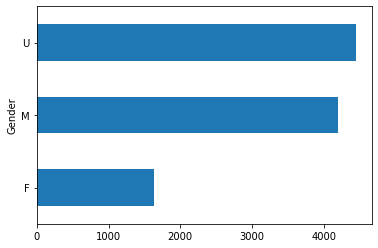

In [ ]:
#Visualizing gender grouping
df.groupby(['Gender'])['UniqueID'].count().plot(kind='barh')

In [ ]:
#Identifying the dog breeds indicated in attacks to find the most popular breeds
dog_types=df['Breed'].value_counts()
dog_types

Pit Bull                                1921
Shih Tzu                                 364
American Pit Bull Terrier/Pit Bull       349
Chihuahua                                344
American Pit Bull Mix / Pit Bull Mix     340
                                        ... 
POODLE OR DALMATION                        1
PUG / JACK RUSS MIX                        1
MALTESE/ YORKSHIRE TERRIER                 1
COOKAPOO                                   1
SHEPHERED MIX                              1
Name: Breed, Length: 1032, dtype: int64

In [ ]:
#Creating a secondary dataset with the top five identified breeds
df_top = df[df['Breed'].isin(['Pit Bull', 'Shih Tzu', 'American Pit Bull Terrier/Pit Bull', 'Chihuahua', 'American Pit Bull Mix / Pit Bull Mix'])]
display(df_top)

,UniqueID,DateOfBite,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
3,4,January 01 2015,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221
4,5,January 03 2015,American Pit Bull Terrier/Pit Bull,1,M,False,Brooklyn,11207
5,6,January 05 2015,American Pit Bull Terrier/Pit Bull,1,F,False,Brooklyn,11209
7,8,January 05 2015,Chihuahua,1,M,False,Brooklyn,11237
12,13,January 05 2015,Shih Tzu,4,F,False,Brooklyn,11205
...,...,...,...,...,...,...,...,...
10264,"10,265",December 13 2017,Pit Bull,6,F,False,Staten Island,10303
10265,"10,266",December 14 2017,Pit Bull,NaN,U,False,Staten Island,NaN
10267,"10,268",December 15 2017,Pit Bull,3,F,False,Staten Island,10301
10271,"10,272",December 17 2017,Pit Bull,8,F,False,Staten Island,NaN
